Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [1]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, r2_score
from prophet.plot import plot_yearly
#dataset
import pandas as pd
import numpy as np


df = pd.read_csv('../datatest/monthly-car-sales.csv')


In [2]:
pd.to_datetime(df['Month'])

df.rename(columns = {'Month': 'ds',
                    'Sales': 'y'},
         inplace=True)

metrics_result_table = pd.DataFrame(columns=['Комментарий',
                                             'MAE']) # сюда буду складывать результаты

df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [3]:
def modeling (model, picture = False): # создаю сразу функцию
    m.fit(df)
    future = m.make_future_dataframe(periods=12, freq = "M")
    forecast = m.predict(future)
    cross_valid = cross_validation(m, horizon='365 days')
    metrics = performance_metrics(cross_valid) 
               
    if picture: # рисовать график, если передаем True
        fig = m.plot(forecast)
    
    return metrics.mean()['mae'] # в качестве метрики я выбрала mae - возвращаю среднее

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

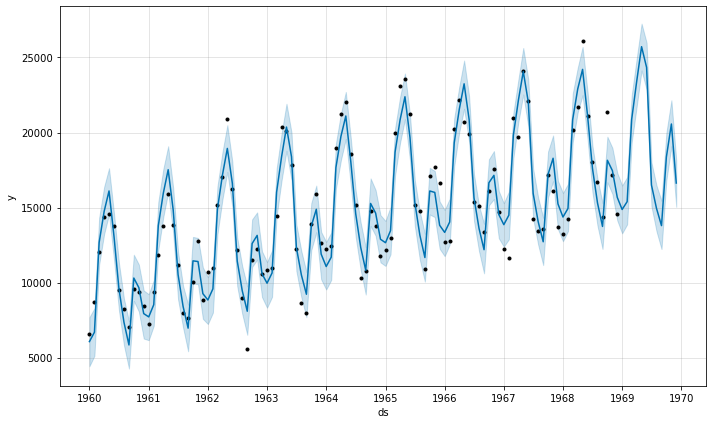

In [4]:
m = Prophet()
a = modeling(m, picture = True)
metrics_result_table.loc[len(metrics_result_table.index)] = ['by default', a]

In [5]:
metrics_result_table

,Комментарий,MAE
0,by default,1572.847054


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

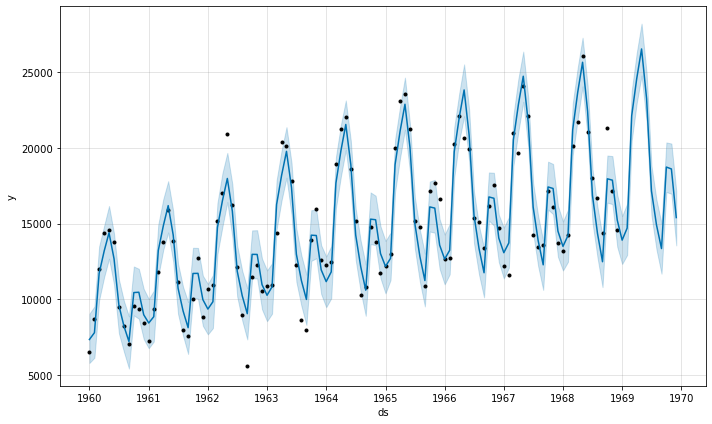

In [6]:
# Пробуем добавить другую операцию для сезонности
m = Prophet(seasonality_mode='multiplicative')

a = modeling(m, picture = True)
metrics_result_table.loc[len(metrics_result_table.index)] = ['multiplicative', a]


In [7]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
0,by default,1572.847054
1,multiplicative,1577.683783


Метрика стала хуже - значит нужно вернуться к аддитивной

In [8]:
# добавим еще одну фичу - среднее за каждый месяц
df['mnth'] = pd.DatetimeIndex(df['ds']).month
avg_vals_mnth = df.groupby('mnth')['y'].mean()
df = df.assign(mnth_avg=df['mnth'].map(avg_vals_mnth))

In [9]:
m = Prophet(seasonality_mode='additive')
m.add_regressor('mnth_avg') # добавляем новую фичу в модель
m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['mnth_avg', metrics.mean()['mae']]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

In [10]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
2,mnth_avg,1560.452128
0,by default,1572.847054
1,multiplicative,1577.683783


Дополнительная фича улучшила метрику. Ура! 

In [11]:
# добавлю еще одну метрику, которая оказалась полезной в прошлой лабораторке
df['Rolling_by_mnth'] = df.groupby('mnth')['y'].rolling(3, closed = 'left').mean().reset_index(0, drop = True)
df = df.where(pd.notna(df), df['mnth_avg'], axis=0) 

In [12]:
m = Prophet(seasonality_mode='additive')
m.add_regressor('Rolling_by_mnth')

m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['Rolling_by_mnth', metrics.mean()['mae']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

In [13]:
# попробую оба регрессора
m = Prophet(seasonality_mode='additive')
m.add_regressor('Rolling_by_mnth')
m.add_regressor('mnth_avg')

m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['mnth_avg and Rolling_by_mnth', metrics.mean()['mae']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

In [14]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
2,mnth_avg,1560.452128
4,mnth_avg and Rolling_by_mnth,1563.607229
0,by default,1572.847054
3,Rolling_by_mnth,1577.067261
1,multiplicative,1577.683783


Суда по метрике, регрессор "Rolling_by_mnth" только мешает. 

,ds,y,mnth,mnth_avg,Rolling_by_mnth
32,1962-09,5568,9,10140.0,10140.0


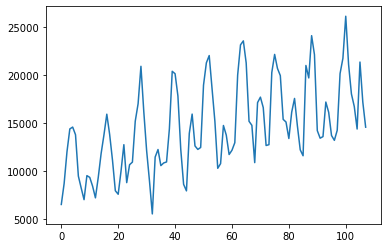

In [15]:
df['y'].plot()  # на графике есть отнозначное "падение" до минимального значения
df[df.y == df.y.min()] # смотрим какой дате оно соответствует

In [16]:
m = Prophet(changepoints=['1962-09']) # сделаем акцент на этой дате
m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['changepoints= 1962-09', metrics.mean()['mae']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

In [17]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
2,mnth_avg,1560.452128
4,mnth_avg and Rolling_by_mnth,1563.607229
0,by default,1572.847054
3,Rolling_by_mnth,1577.067261
1,multiplicative,1577.683783
5,changepoints= 1962-09,1640.488439


И это оказалось бесполезным для моей модели... Ну и ладно 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

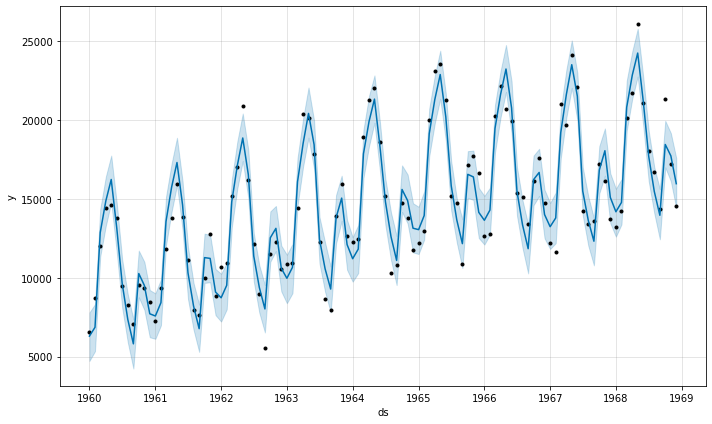

In [18]:

m = Prophet(changepoint_prior_scale=0.5)
m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['changepoint_prior_scale=0.5', metrics.mean()['mae']]
fig = m.plot(forecast)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

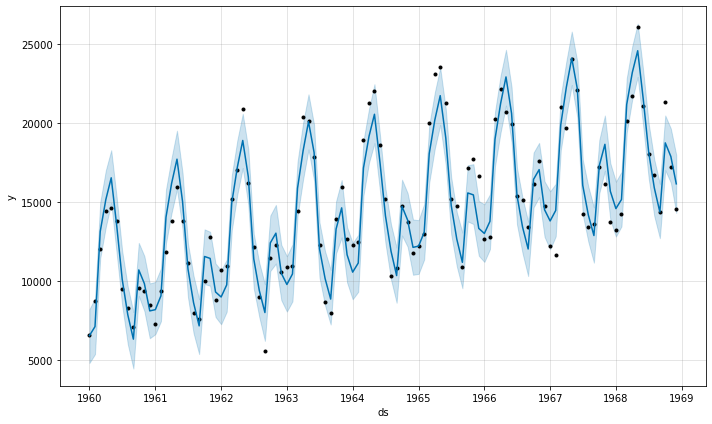

In [19]:
m = Prophet(changepoint_prior_scale=0.001)
m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['changepoint_prior_scale=0.001', metrics.mean()['mae']]
fig = m.plot(forecast)

In [20]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
2,mnth_avg,1560.452128
4,mnth_avg and Rolling_by_mnth,1563.607229
0,by default,1572.847054
3,Rolling_by_mnth,1577.067261
1,multiplicative,1577.683783
7,changepoint_prior_scale=0.001,1633.567211
5,changepoints= 1962-09,1640.488439
6,changepoint_prior_scale=0.5,1820.205529


changepoint_prior_scale тоже не дало улучшения. Значение 0.05 по умолчанию, похоже подходит лучше всего.

In [21]:
from prophet.plot import plot_yearly
m1 = Prophet(yearly_seasonality=7).fit(df) # по умолчанию 10, пробуем 7 (єто значение дает лучший результат - 
                                          #определила в ходе многочисленніх єкспериментов)
forecast = m1.predict(df)

cross_valid = cross_validation(m1, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['yearly_seasonality=7', metrics.mean()['mae']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


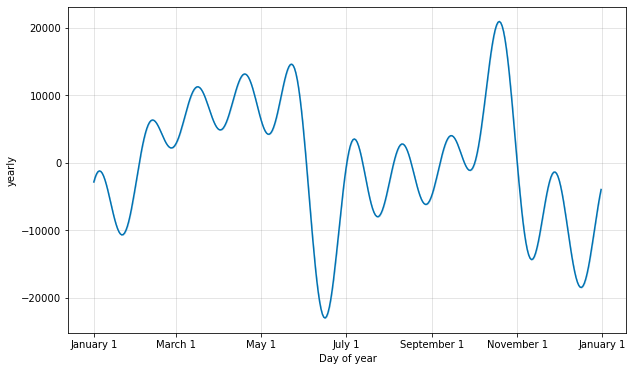

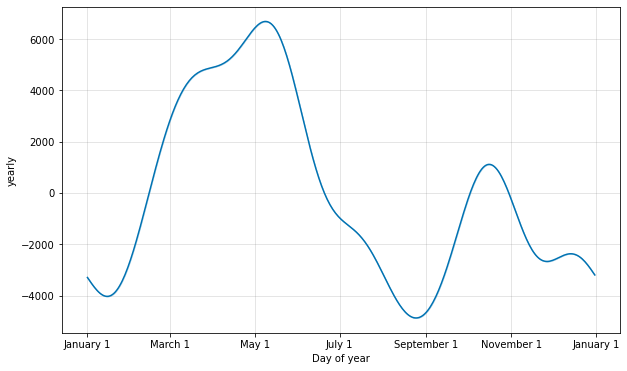

In [22]:
plot_yearly(m) #  10
plot_yearly(m1) # 7

In [23]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
8,yearly_seasonality=7,1431.212105
2,mnth_avg,1560.452128
4,mnth_avg and Rolling_by_mnth,1563.607229
0,by default,1572.847054
3,Rolling_by_mnth,1577.067261
1,multiplicative,1577.683783
7,changepoint_prior_scale=0.001,1633.567211
5,changepoints= 1962-09,1640.488439
6,changepoint_prior_scale=0.5,1820.205529


И это работало хорошо - значительно улучшило метрику

In [24]:
# пробую дополнительный регрессор и yearly_seasonality=7 вместе
m = Prophet(yearly_seasonality=7) 
                                        
m.add_regressor('mnth_avg')
m.fit(df)
forecast = m.predict(df)

cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 
metrics_result_table.loc[len(metrics_result_table.index)] = ['yearly_seasonality=7 and mnth_avg', metrics.mean()['mae']]



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

In [25]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
8,yearly_seasonality=7,1431.212105
9,yearly_seasonality=7 and mnth_avg,1441.779038
2,mnth_avg,1560.452128
4,mnth_avg and Rolling_by_mnth,1563.607229
0,by default,1572.847054
3,Rolling_by_mnth,1577.067261
1,multiplicative,1577.683783
7,changepoint_prior_scale=0.001,1633.567211
5,changepoints= 1962-09,1640.488439
6,changepoint_prior_scale=0.5,1820.205529


Ну и чуда не произошло, к сожалению. 

По результатам моих изысканий лучшей моделью остается модель по умолчанию, с yearly_seasonality=7